# Day 17 Workout - Bivariate Stats Numeric to Categorical

Try modifying the t-testcode in the introduction include the feature 'Marital Status' from the original dataset. Create two lists of income for those who are single versus married. Perform a t-test. Is there a difference in income between single versus married customers?

In [3]:
import pandas as pd

df = pd.read_csv('data/bikebuyers.csv')
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,11000,Married,Male,1,0,90000,2,4,2,0,40,1,1,Bachelors,Professional,Yes,1-2 Miles,Pacific,Yes
1,11047,Married,Female,1,1,30000,3,2,2,2,56,0,1,High School,Skilled Manual,No,1-2 Miles,Pacific,Yes
2,11061,Married,Male,1,0,80000,2,3,4,2,52,1,1,Partial College,Skilled Manual,Yes,5-10 Miles,Pacific,Yes
3,11090,Single,Male,0,0,90000,2,3,3,1,48,1,1,Partial College,Professional,Yes,2-5 Miles,North America,Yes
4,11116,Married,Male,1,0,70000,5,3,4,2,43,1,0,Partial College,Skilled Manual,Yes,5-10 Miles,Pacific,No


In [4]:
married = df[df['Marital Status'] == 'Married']['Income']
single = df[df['Marital Status'] == 'Single']['Income']

print(married.mean())
print(single.mean())

58441.55844155844
53449.023861171365


In [6]:
from scipy import stats

stats.ttest_ind(married, single)

TtestResult(statistic=2.5388846033694885, pvalue=0.011271571956825748, df=998.0)

### Part 2

You have been hired as a consultant to analyze NFL plays in order to eventually predict how many yards will be earned by each play. Use the NFL data in the data folder to complete the following tasks.

Import the nfl_plays_2022 dataset into a DataFrame and print the first five records to examine the data. Use pd.set_option('display.max_columns', None) after you import pands in order to view all columns.

In [7]:
nfl = pd.read_csv('data/nfl_plays_2022.csv')

In [8]:
nfl.head()

,GameId,Month,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,YardLineFixed,YardLineDirection,IsPenaltyAccepted,IsNoPlay,PenaltyYards
0,2022090800,September,4,9,25,BUF,LA,0,0,85,...,0,0,0,0,0,15,OPP,0,0,0
1,2022090800,September,4,13,27,BUF,LA,0,0,85,...,0,0,0,0,0,15,OPP,0,0,0
2,2022090800,September,3,7,59,BUF,LA,0,0,85,...,0,0,0,0,0,15,OPP,0,0,0
3,2022090800,September,1,9,56,BUF,LA,0,0,85,...,0,0,0,0,0,15,OPP,0,0,0
4,2022090800,September,2,3,0,LA,BUF,0,0,85,...,0,0,0,0,0,15,OPP,0,0,0


Drop all records except those with the formation of 'UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', or 'NO HUDDLE SHOTGUN'.

In [10]:
nfl_subset = nfl[nfl.Formation.isin(['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', 'NO HUDDLE SHOTGUN'])]

In [15]:
nfl_subset.Formation.unique()

array(['UNDER CENTER', 'SHOTGUN', 'NO HUDDLE', 'NO HUDDLE SHOTGUN'],
      dtype=object)

Calculate the mean Yards for each Formation and add it to a KDE chart to view the differences by Formation

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

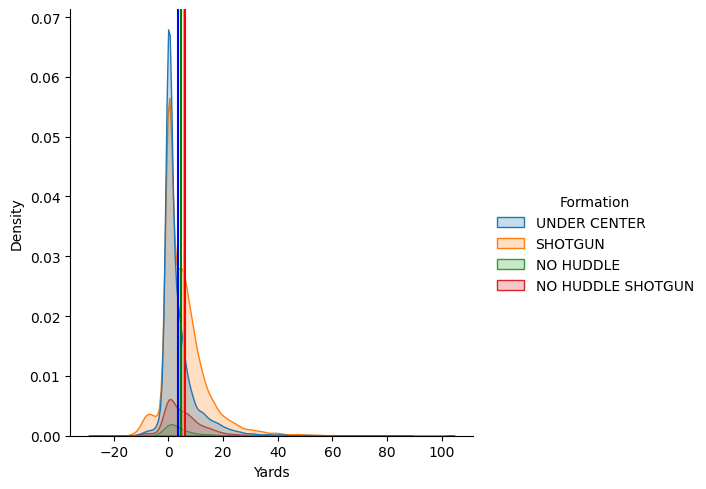

In [17]:
underCenter = nfl_subset[nfl_subset.Formation == 'UNDER CENTER'].Yards
shotgun = nfl_subset[nfl_subset.Formation == 'SHOTGUN'].Yards
noHuddle = nfl_subset[nfl_subset.Formation == 'NO HUDDLE'].Yards
noHuddleShotgun = nfl_subset[nfl_subset.Formation == 'NO HUDDLE SHOTGUN'].Yards

sns.displot(nfl_subset, x="Yards", hue="Formation", kind='kde', fill=True)
plt.axvline(x=underCenter.mean(), color='blue')
plt.axvline(x=shotgun.mean(), color='orange')
plt.axvline(x=noHuddle.mean(), color='green')
plt.axvline(x=noHuddleShotgun.mean(), color='red')
plt.show()

Using a t-test, determine whether there is a significant difference in Yards between No Huddle Shotgun and Under Center Formations



In [19]:
from scipy import stats

stats.ttest_ind(underCenter, noHuddleShotgun)

TtestResult(statistic=-14.564941231914194, pvalue=9.985085763249184e-48, df=14904.0)

Using an ANOVA, determine whether there is a significant difference among all four Formations

In [20]:
# F test
stats.f_oneway(shotgun, underCenter, noHuddle, noHuddleShotgun)

F_onewayResult(statistic=163.28299973772144, pvalue=4.637069096709806e-105)